# Projekt 2 Inzynieria cech

In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cluster import KMeans, KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn_extra.cluster import KMedoids
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score,davies_bouldin_score

In [48]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [2]:
data=pd.read_csv("online.csv")

In [3]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
enc = OneHotEncoder()
enc_df = pd.DataFrame(enc.fit_transform(data[['Month']]).toarray(),columns=enc.categories_[0])
data = data.join(enc_df)
data=data.drop('Month',axis=1)

In [5]:
enc_df = pd.DataFrame(enc.fit_transform(data[['OperatingSystems']]).toarray(),columns=list(map(lambda x:'os'+str(x), enc.categories_[0])))
data = data.join(enc_df)
data=data.drop('OperatingSystems',axis=1)

In [6]:
enc_df = pd.DataFrame(enc.fit_transform(data[['Browser']]).toarray(),columns=list(map(lambda x:'br'+str(x), enc.categories_[0])))
data = data.join(enc_df)
data=data.drop('Browser',axis=1)

In [7]:
enc_df = pd.DataFrame(enc.fit_transform(data[['Region']]).toarray(),columns=list(map(lambda x:'reg'+str(x), enc.categories_[0])))
data = data.join(enc_df)
data=data.drop('Region',axis=1)

In [8]:
enc_df = pd.DataFrame(enc.fit_transform(data[['TrafficType']]).toarray(),columns=list(map(lambda x:'traftype'+str(x), enc.categories_[0])))
data = data.join(enc_df)
data=data.drop('TrafficType',axis=1)

In [9]:
enc_df = pd.DataFrame(enc.fit_transform(data[['VisitorType']]).toarray(),columns=enc.categories_[0])
data = data.join(enc_df)
data=data.drop('VisitorType',axis=1)

In [10]:
le=LabelEncoder()
data['Weekend']=le.fit_transform(data['Weekend'])
data['Revenue']=le.fit_transform(data['Revenue'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 75 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Weekend                  12330 non-null  int64  
 11  Revenue                  12330 non-null  int64  
 12  Aug                      12330 non-null  float64
 13  Dec                      12330 non-null  float64
 14  Feb                   

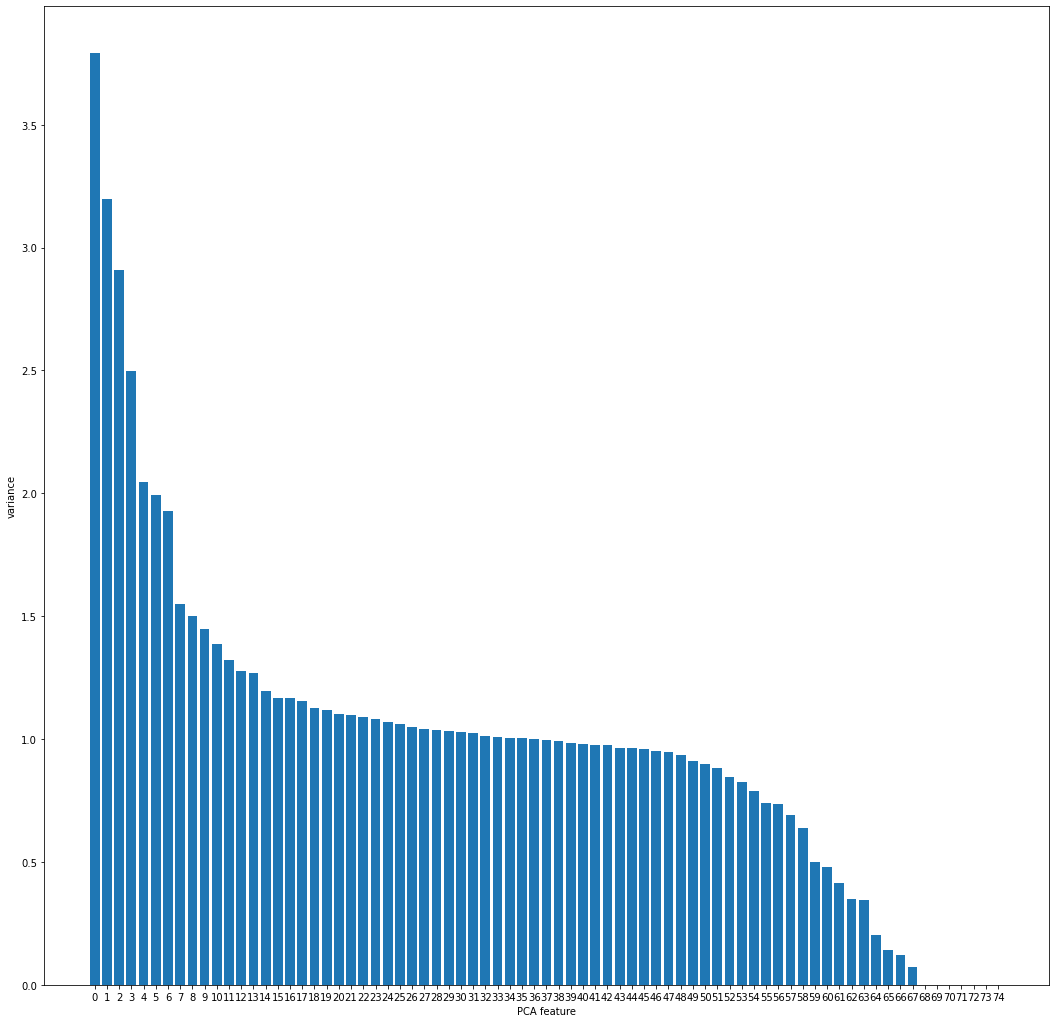

In [12]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler,pca)
pipeline.fit(data)
features = range(pca.n_components_)
plt.figure(figsize=(18,18))
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [33]:
pca.n_components=50
pipeline = make_pipeline(scaler,pca)
new_data=pipeline.fit_transform(data)
new_data

array([[-4.68338407, -0.1209802 , -2.23683049, ...,  1.55581569,
        -1.05531088, -0.97482125],
       [-1.23501846, -0.70786671,  0.6063013 , ...,  1.42945414,
        -0.56195658, -2.00576969],
       [-4.72286916,  0.94378737, -1.10933649, ...,  2.33772806,
         2.14046665, -1.26281523],
       ...,
       [-1.60720167, -1.16329964,  1.12095877, ..., -0.49443818,
         0.18260254, -1.57380825],
       [ 0.31990593, -0.54176362,  0.78423041, ...,  1.05653469,
         0.383693  , -0.24995729],
       [-0.09549766,  1.03727588, -0.18202129, ..., -0.19316275,
        -0.16234605,  0.43571821]])

,0,1,2,3,4,5,6,7,8,9,10,11
0,-4.669709,-0.177283,-2.205380,2.646505,-0.006541,-0.121031,-2.071128,1.625134,2.331817,1.826895,0.298385,-0.690928
1,-1.220292,-0.768249,0.653157,-0.386174,-0.344493,0.371488,-1.334309,1.881233,0.658514,0.038082,-1.560822,0.084366
2,-4.715926,0.904554,-1.081911,2.814325,-0.245072,0.364649,-1.121561,2.011676,1.644777,1.990585,-1.392218,3.048105
3,-2.690898,-1.287667,0.877629,0.826531,-0.292097,-1.144892,0.602439,-0.129839,0.290869,0.966545,0.236167,0.676994
4,-2.223921,-0.710756,-0.522964,0.913359,-0.408934,-2.009262,1.209514,0.195484,-0.518729,-1.063528,3.381085,1.291829


ValueError: x and y must have same first dimension, but have shapes (8,) and (18,)

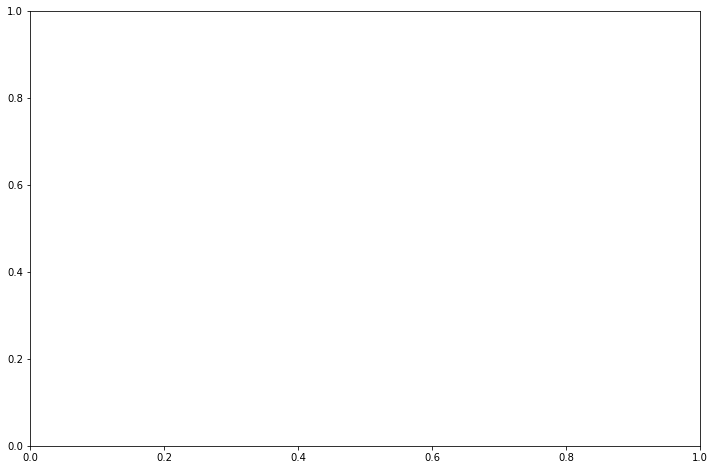

In [34]:
scores = []
df2=df.sample(n=5000)
for i in range(2, 20):
    model = KMeans(n_clusters=i)
    y_pred = model.fit_predict(new_data)
    scores.append(silhouette_score(new_data, y_pred))
plt.figure(figsize=(12,8))
x = list(range(2, 20))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('The silhouette score for each k')
plt.show()

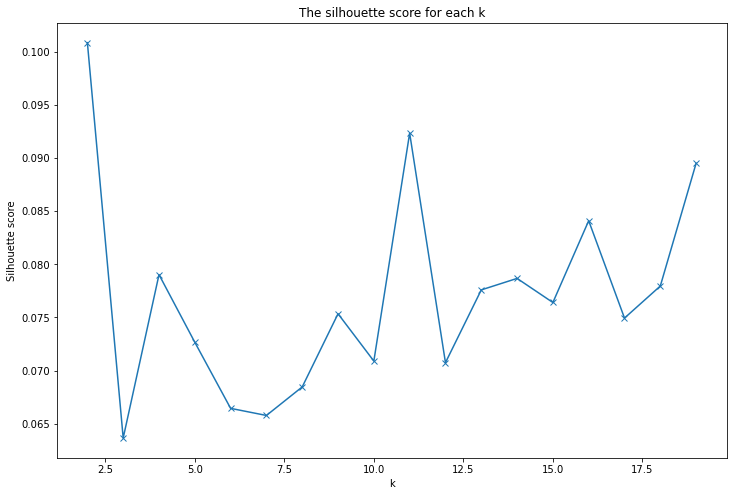

In [35]:
plt.figure(figsize=(12,8))
x = list(range(2, 20))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('The silhouette score for each k')
plt.show()

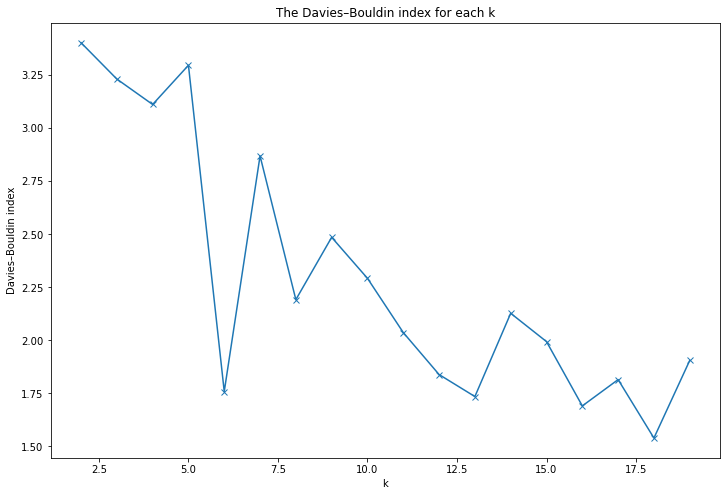

In [36]:
scores = []
for i in range(2, 20):
    model = KMeans(n_clusters=i)
    model.fit(new_data)
    y_pred = model.fit_predict(new_data)
    scores.append(davies_bouldin_score(new_data,y_pred))
plt.figure(figsize=(12,8))
x = list(range(2, 20))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Davies–Bouldin index')
plt.title('The Davies–Bouldin index for each k')
plt.show()

In [39]:
model = KMeans(n_clusters=13)
y_pred = model.fit_predict(new_data)

In [40]:
pd.unique(y_pred)

array([ 4,  2, 10,  9,  8, 12,  5, 11,  1,  0,  6,  7,  3])

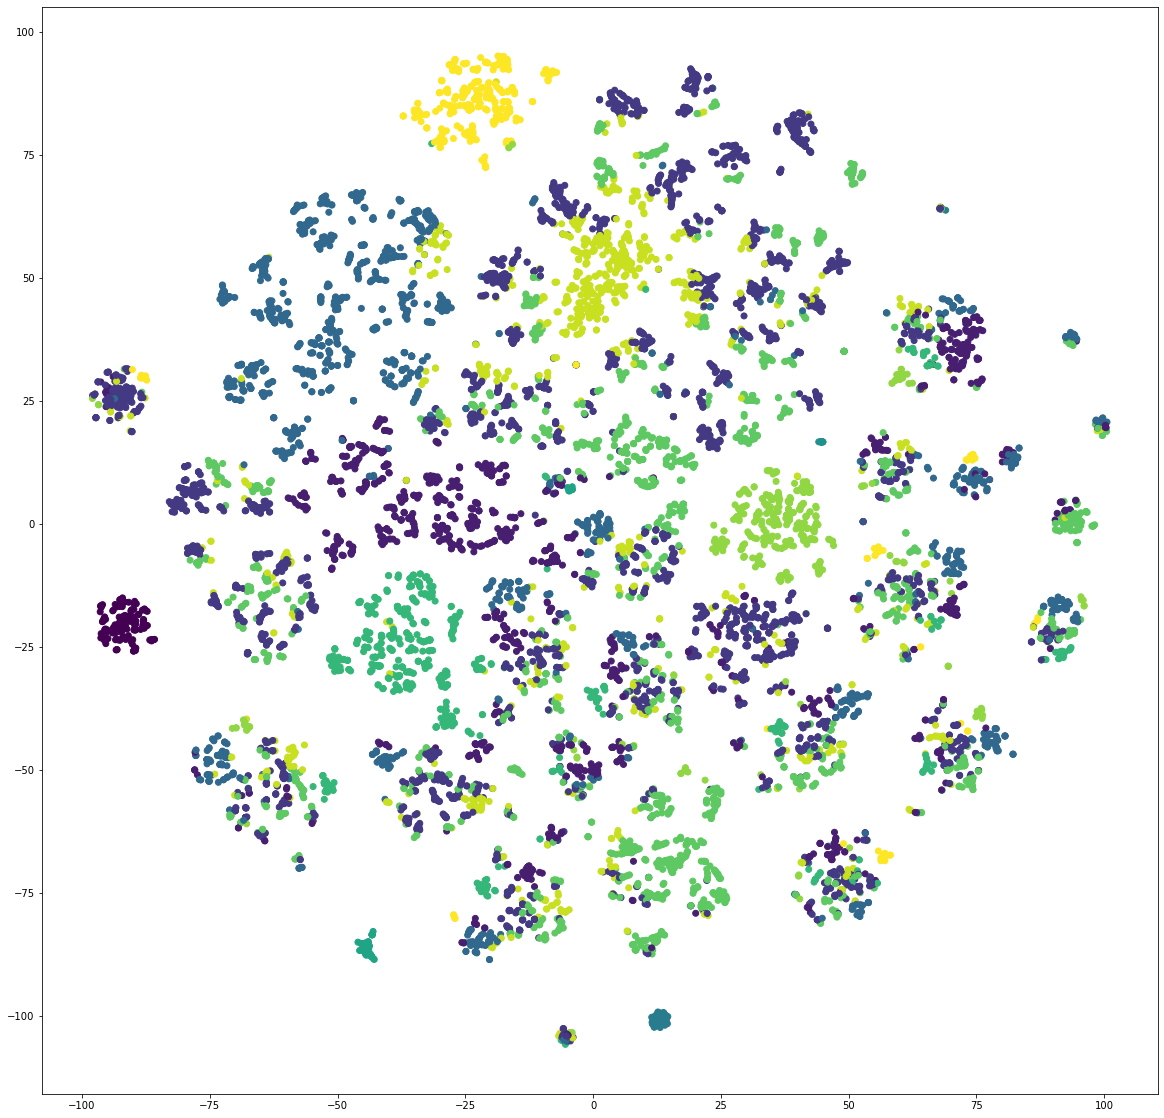

In [41]:
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(new_data)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.figure(figsize=(20,20))
plt.scatter(xs,ys, c=y_pred)
plt.show()

## KMedoids

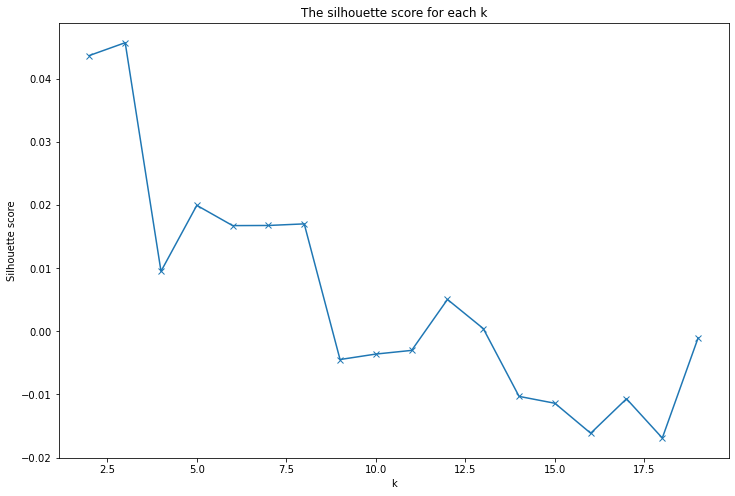

In [53]:
scores = []
for i in range(2, 20):
    model = KMedoids(n_clusters=i)
    model.fit(new_data)
    labels=model.labels_
    scores.append(silhouette_score(new_data, labels))
plt.figure(figsize=(12,8))
x = list(range(2, 20))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.title('The silhouette score for each k')
plt.show()

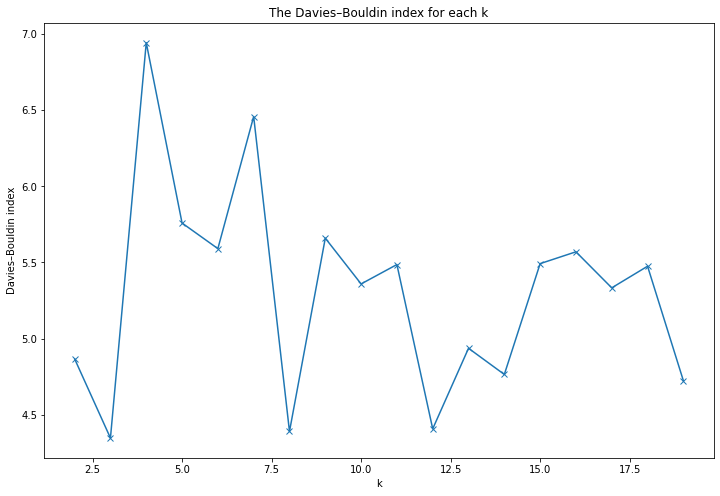

In [54]:
scores = []
for i in range(2, 20):
    model = KMedoids(n_clusters=i)
    model.fit(new_data)
    labels=model.labels_
    scores.append(davies_bouldin_score(new_data,labels))
plt.figure(figsize=(12,8))
x = list(range(2, 20))
plt.plot(x, scores, 'x-')
plt.xlabel('k')
plt.ylabel('Davies–Bouldin index')
plt.title('The Davies–Bouldin index for each k')
plt.show()

In [55]:
model = KMedoids(n_clusters=13)
y_pred = model.fit_predict(new_data)

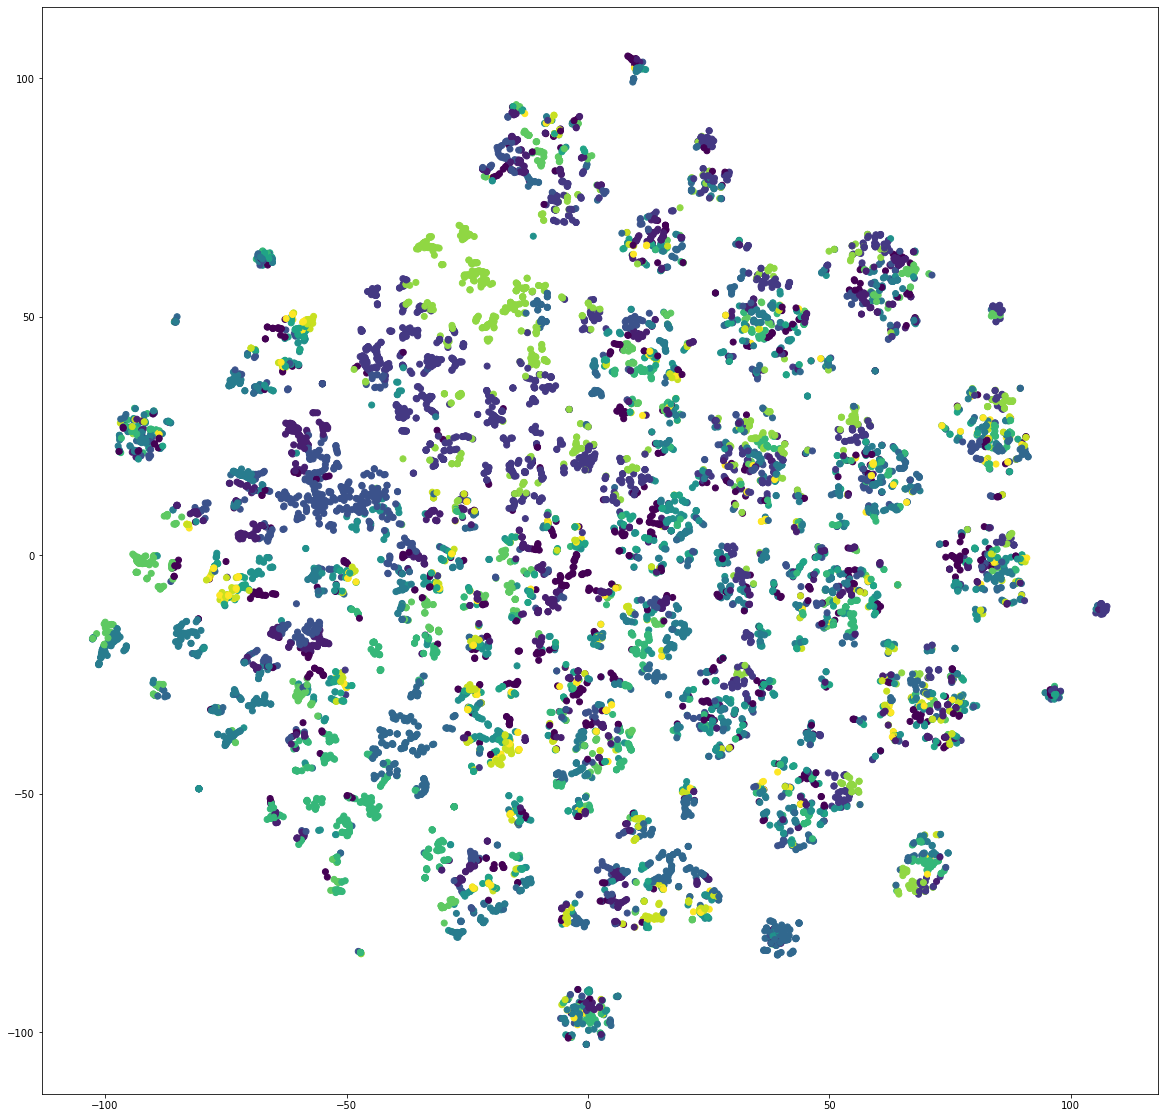

In [56]:
model = TSNE(learning_rate=200)
tsne_features = model.fit_transform(new_data)
xs = tsne_features[:,0]
ys = tsne_features[:,1]
plt.figure(figsize=(20,20))
plt.scatter(xs,ys, c=y_pred)
plt.show()